In [421]:
import random
import pandas as pd
import matplotlib.pyplot as plt

In [422]:
class Kampus:
    def __init__(self,nama_kampus,prodi):
        self.nama_kampus = nama_kampus
        self.prodi = prodi
        self.anggaran = 0
        self.pengeluaran = 0
        self.dosen = 0
    
    def tambahAnggaran(self,pemasukan):
        self.anggaran += pemasukan
        
    def tambahPengeluaran(self,pengeluaran):
        self.pengeluaran += pengeluaran
        

class Mahasiswa:
    def __init__(self,id,prodi,angkatan):
        self.id = id
        self.prodi = prodi
        self.angkatan = angkatan
        
class Prodi:
    def __init__(self,namaProdi,UKT,kodeProdi):
        self.mahasiswa = []
        self.nama_prodi = namaProdi
        self.kodeProdi = kodeProdi
        self.angkatan = []
        self.kelas = []
        self.UKT = UKT
        self.dosen = 0
        
    def tambah_kelas(self,nama_kelas):
        self.kelas.append(nama_kelas)
    
    def tambah_angkatan(self,tahunAngkatan):
        self.angkatan.append(tahunAngkatan)
        
    def tambah_mahasiswa(self,mahasiswa):
        self.mahasiswa.append(mahasiswa)
        

class Kelas:
    def __init__(self,nama_kelas):
        self.nama_kelas = nama_kelas
        self.mahasiswa = []
        
    def tambahMahasiswa(self,namaMahasiswa):
        self.mahasiswa.append(namaMahasiswa)

In [423]:
prodi = [Prodi("Informatika",7000000,"IF"),
         Prodi("Sistem Informasi",8000000,"SI"),
         Prodi("Teknologi Indormasi",8000000,"TI"),
         Prodi("Rekayasa Perangkat Lunak",8500000,"RPL"),
         Prodi("Sains Data",7000000,"DS")]

In [424]:
ITTelkom = Kampus("ITTelkom Madura",prodi)

In [425]:
def hitungMahasiswa(prodi):
    total = 0
    for i in prodi:
        total += len(i.mahasiswa)
    return total

In [426]:
def pembagianKelas(prodi,angkatan):
    for program_studi in prodi:
        total_mahasiswa = len(program_studi.mahasiswa)
        kelas = total_mahasiswa // 30
        program_studi.angkatan.append(angkatan)
        
        program_studi.dosen += total_mahasiswa // 40
        ITTelkom.dosen += program_studi.dosen
        
        # Buat Kelas
        for i in range(1,kelas + 1):
            program_studi.tambah_kelas(Kelas(f"{program_studi.kodeProdi}-{angkatan % 2000}-{i}"))
        
        for x in program_studi.kelas:
            for i in range(30):
                x.tambahMahasiswa(program_studi.mahasiswa[i])
        
        # Pembagian
        if kelas * 30 < len(program_studi.mahasiswa):
            program_studi.tambah_kelas(Kelas(f"{program_studi.kodeProdi}-{angkatan % 2000}-{kelas+ 1}"))
            for i in range(kelas * 30 + 1, len(program_studi.mahasiswa)):
                program_studi.kelas[-1].tambahMahasiswa(program_studi.mahasiswa[i])

In [427]:
def simulasiKampus(tahunStart,tahunTerakhir):
    a = 0
    angkatan = tahunStart
    growth_factor = 1.02
    mahasiswa = random.randint(1,100)
    cashFlowKampus = []
    for _ in range(tahunTerakhir - tahunStart):
        for bulan in range(1,12 + 1):    
            # MAHASISWA AKTIF
            if(bulan == 2 or bulan == 11):
                for i in prodi:
                    ITTelkom.tambahAnggaran(len(i.mahasiswa) * i.UKT)
                    
            # PENDAFTARAN
            for _ in range(30): 
                if random.random() < 0.5:
                    mahasiswa += int(mahasiswa * random.uniform(0.05, 0.5) * growth_factor)
                else:
                    mahasiswa -= int(mahasiswa * random.uniform(0.05, 0.5) * growth_factor)
                for _ in range(random.randint(1,mahasiswa)):
                    BiayaUP3 = 8000000
                    BiaySDP = 12150000
                    if hitungMahasiswa(prodi) == 600:
                        break 
                    if random.random() < 0.5:
                        prodiID = random.randint(0, 4)
                        a += 1
                        prodi[prodiID].tambah_mahasiswa(Mahasiswa(a, prodi[prodiID], angkatan))
                        ITTelkom.tambahAnggaran(BiayaUP3 + BiaySDP + prodi[prodiID].UKT) 
                        
            # CASH FLOW
            gajiDosen = 7000000 * ITTelkom.dosen
            pengeluaran = 0.7 * ITTelkom.anggaran / 12  + gajiDosen
            ITTelkom.pengeluaran = pengeluaran
            cashflow = ITTelkom.anggaran - pengeluaran
            cashFlowKampus.append([angkatan,bulan,ITTelkom.anggaran,ITTelkom.pengeluaran,cashflow]) 
            ITTelkom.anggaran -= pengeluaran           
        
        # PEMBAGIAN KELAS
        pembagianKelas(prodi,angkatan)  
        angkatan += 1
        
    return cashFlowKampus

In [428]:
result = simulasiKampus(2021,2024)
result

[[2021, 1, 3482750000, 203160416.66666666, 3279589583.3333335],
 [2021, 2, 9395839583.333334, 548090642.361111, 8847748940.972223],
 [2021, 3, 16936248940.972223, 987947854.8900462, 15948301086.082176],
 [2021, 4, 15948301086.082176, 930317563.3547935, 15017983522.727383],
 [2021, 5, 15017983522.727383, 876049038.8257638, 14141934483.901619],
 [2021, 6, 14141934483.901619, 824946178.2275944, 13316988305.674025],
 [2021, 7, 13316988305.674025, 776824317.8309847, 12540163987.84304],
 [2021, 8, 12540163987.84304, 731509565.9575106, 11808654421.88553],
 [2021, 9, 11808654421.88553, 688838174.6099893, 11119816247.275541],
 [2021, 10, 11119816247.275541, 648655947.7577399, 10471160299.517801],
 [2021, 11, 15104660299.517801, 881105184.1385384, 14223555115.379263],
 [2021, 12, 14223555115.379263, 829707381.730457, 13393847733.648806],
 [2022, 1, 13393847733.648806, 865307784.4628469, 12528539949.185959],
 [2022, 2, 17162039949.185959, 1085118997.0358477, 16076920952.150112],
 [2022, 3, 160769

In [429]:
columns = ['tahun', 'bulan', 'pemasukan', 'pengeluaran', 'cashflow']
df = pd.DataFrame(result, columns=columns)
dfeachYear = []

tahuncolumns = df.tahun.unique().tolist()

for i in tahuncolumns:
    dfeachYear.append(df.loc[df.tahun == i])

In [430]:
dfeachYear

[    tahun  bulan     pemasukan   pengeluaran      cashflow
 0    2021      1  3.482750e+09  2.031604e+08  3.279590e+09
 1    2021      2  9.395840e+09  5.480906e+08  8.847749e+09
 2    2021      3  1.693625e+10  9.879479e+08  1.594830e+10
 3    2021      4  1.594830e+10  9.303176e+08  1.501798e+10
 4    2021      5  1.501798e+10  8.760490e+08  1.414193e+10
 5    2021      6  1.414193e+10  8.249462e+08  1.331699e+10
 6    2021      7  1.331699e+10  7.768243e+08  1.254016e+10
 7    2021      8  1.254016e+10  7.315096e+08  1.180865e+10
 8    2021      9  1.180865e+10  6.888382e+08  1.111982e+10
 9    2021     10  1.111982e+10  6.486559e+08  1.047116e+10
 10   2021     11  1.510466e+10  8.811052e+08  1.422356e+10
 11   2021     12  1.422356e+10  8.297074e+08  1.339385e+10,
     tahun  bulan     pemasukan   pengeluaran      cashflow
 12   2022      1  1.339385e+10  8.653078e+08  1.252854e+10
 13   2022      2  1.716204e+10  1.085119e+09  1.607692e+10
 14   2022      3  1.607692e+10  1.0218

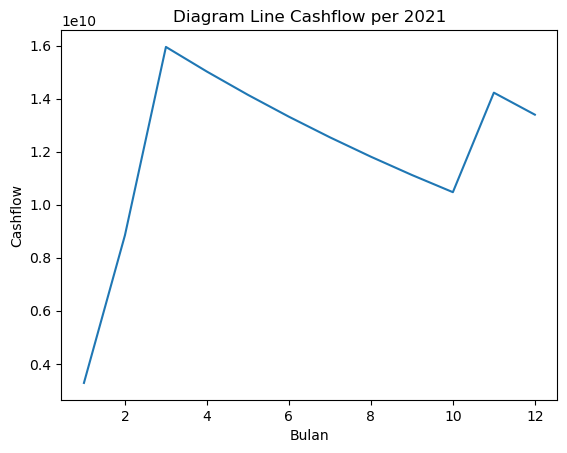

NameError: name 'cashflow_per_tahun_2022' is not defined

In [437]:
plt.plot(dfeachYear[0].bulan,dfeachYear[0].cashflow)
plt.xlabel('Bulan')
plt.ylabel('Cashflow')
plt.title('Diagram Line Cashflow per 2021')

plt.show()

plt.plot(cashflow_per_tahun_2022['bulan'], cashflow_per_tahun_2022['cashflow'])
plt.xlabel('Bulan')
plt.ylabel('Cashflow')
plt.title('Diagram Line Cashflow per 2022')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


plt.show()

In [432]:
for i in prodi:
    print(i.kodeProdi,end='\n')
    for x in i.kelas:
        print(f"{x.nama_kelas} : {[i.id for i in x.mahasiswa]}")
    print("")

IF
IF-21-1 : [13, 26, 36, 37, 41, 46, 51, 52, 54, 62, 65, 69, 71, 76, 82, 87, 91, 92, 101, 119, 123, 141, 143, 147, 149, 154, 157, 163, 165, 183, 13, 26, 36, 37, 41, 46, 51, 52, 54, 62, 65, 69, 71, 76, 82, 87, 91, 92, 101, 119, 123, 141, 143, 147, 149, 154, 157, 163, 165, 183, 13, 26, 36, 37, 41, 46, 51, 52, 54, 62, 65, 69, 71, 76, 82, 87, 91, 92, 101, 119, 123, 141, 143, 147, 149, 154, 157, 163, 165, 183]
IF-21-2 : [13, 26, 36, 37, 41, 46, 51, 52, 54, 62, 65, 69, 71, 76, 82, 87, 91, 92, 101, 119, 123, 141, 143, 147, 149, 154, 157, 163, 165, 183, 13, 26, 36, 37, 41, 46, 51, 52, 54, 62, 65, 69, 71, 76, 82, 87, 91, 92, 101, 119, 123, 141, 143, 147, 149, 154, 157, 163, 165, 183, 13, 26, 36, 37, 41, 46, 51, 52, 54, 62, 65, 69, 71, 76, 82, 87, 91, 92, 101, 119, 123, 141, 143, 147, 149, 154, 157, 163, 165, 183]
IF-21-3 : [13, 26, 36, 37, 41, 46, 51, 52, 54, 62, 65, 69, 71, 76, 82, 87, 91, 92, 101, 119, 123, 141, 143, 147, 149, 154, 157, 163, 165, 183, 13, 26, 36, 37, 41, 46, 51, 52, 54, 62, 